## Observations and Insights

## Dependencies and starter code

In [17]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import linregress
import numpy as np


# Study data files
mouse_csv = "metadata.csv"
study_results_csv = "Study_results.csv"

# Read the mouse data and the study results
mouse_df = pd.read_csv(mouse_csv)
study_results_df = pd.read_csv(study_results_csv)

# Combine the data into a single dataset
comb_df = pd.merge(mouse_df, study_results_df, on="Mouse ID", how='left')
comb_df = comb_df.rename(columns={"Tumor Volume (mm3)":"TumorVolume"})
comb_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,TumorVolume,Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [18]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
TumorVolume_mean = comb_df['TumorVolume'].groupby([comb_df['Drug Regimen']]).mean()
TumorVolume_median = comb_df['TumorVolume'].groupby([comb_df['Drug Regimen']]).median()
TumorVolume_var = comb_df['TumorVolume'].groupby([comb_df['Drug Regimen']]).var()
TumorVolume_std = comb_df['TumorVolume'].groupby([comb_df['Drug Regimen']]).std()
TumorVolume_sem = comb_df['TumorVolume'].groupby([comb_df['Drug Regimen']]).sem()

summary_stats = pd.DataFrame({"Mean":TumorVolume_mean,
                            "Median":TumorVolume_median,
                             "Variance": TumorVolume_var,
                             "Std. Deviation": TumorVolume_std,
                             "SEM": TumorVolume_sem})
summary_stats = pd.DataFrame(summary_stats)
summary_stats
                            

,Mean,Median,Variance,Std. Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

Text(0, 0.5, 'Number of Data Points')

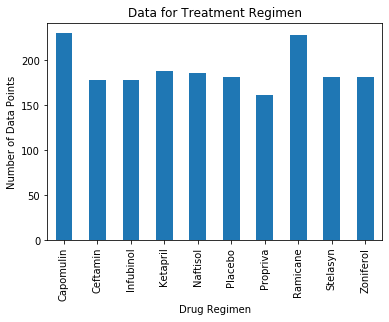

In [19]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
data_points = comb_df.groupby('Drug Regimen')
count_data_points = data_points['Drug Regimen'].count()

count_chart = count_data_points.plot(kind='bar')
count_chart.set_title("Data for Treatment Regimen")
count_chart.set_xlabel("Drug Regimen")
count_chart.set_ylabel("Number of Data Points")

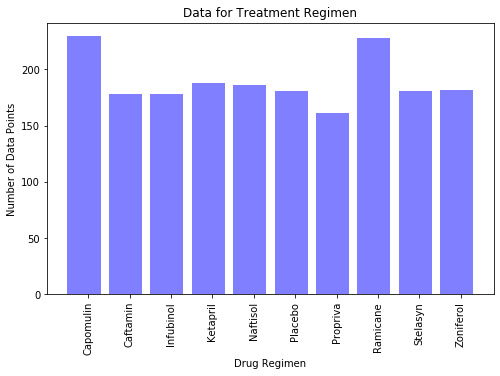

<Figure size 432x288 with 0 Axes>

In [20]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
data_points = comb_df.groupby('Drug Regimen')
count_data_points = data_points['Drug Regimen'].count()

x_axis = np.arange(len(count_data_points))
tick_locations = [value+0.5 for value in x_axis]
plt.figure(figsize=(8,5))
plt.bar(x_axis, count_data_points, color='b', alpha=0.5, align="edge")
plt.xticks(tick_locations, ["Capomulin", "Caftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"], rotation="vertical")
plt.title("Data for Treatment Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")

plt.show()
plt.tight_layout()


## Pie plots

Sex
Female    935
Male      958
Name: Sex, dtype: int64


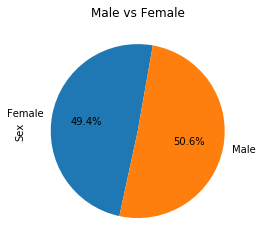

In [21]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender = comb_df.groupby('Sex')
count_gender = gender['Sex'].count()
print(count_gender)
gender_pie = count_gender.plot(kind='pie', autopct="%1.1f%%",startangle=80, title="Male vs Female")


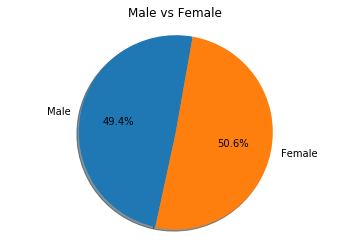

In [22]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender = comb_df.groupby('Sex')
Sex = comb_df['Sex'].unique()
count_gender = gender['Sex'].count()


plt.pie(count_gender, labels=Sex, autopct="%1.1f%%",shadow=True,startangle=80) 
plt.title("Male vs Female")
plt.axis("equal")
plt.show()

## Quartiles, outliers and boxplots

In [38]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
FinalTumor_Volume = comb_df.groupby(["Mouse ID"]).max()
FinalTumor_Volume = FinalTumor_Volume.reset_index()
DataTime = FinalTumor_Volume[["Mouse ID", "Timepoint"]]
TumorData = pd.merge(DataTime, comb_df, on=['Mouse ID','Timepoint'], how='left')


Infubinol_df=  pd.DataFrame({"Tumor Volume":TumorData.loc[TumorData["Drug Regimen"] == "Infubinol"]['TumorVolume']})
Ceftamin_df =  pd.DataFrame({"Tumor Volume":TumorData.loc[TumorData["Drug Regimen"] == "Ceftamin"]['TumorVolume']})
Placebo_df =  pd.DataFrame({"Tumor Volume":TumorData.loc[TumorData["Drug Regimen"] == "Placebo"]['TumorVolume']})
Stelasyn_df =  pd.DataFrame({"Tumor Volume":TumorData.loc[TumorData["Drug Regimen"] == "Stelasyn"]['TumorVolume']})


Infubinol_quartiles = Infubinol_df[('Tumor Volume')].quantile([.25,.5,.75])
Infubinol_lowerq = Infubinol_quartiles[0.25]
Infubinol_upperq = Infubinol_quartiles[0.75]
Infubinol_iqr = Infubinol_upperq-Infubinol_lowerq

Infubinol_lower_bound = Infubinol_lowerq - (1.5*Infubinol_iqr)
Infubinol_upper_bound = Infubinol_upperq + (1.5*Infubinol_iqr)

Infubinol_outlier = Infubinol_df.loc[(Infubinol_df['Tumor Volume'] < Infubinol_lower_bound) | (Infubinol_df['Tumor Volume'] > Infubinol_upper_bound)]
Infubinol_outlier = Infubinol_outlier['Tumor Volume'].count()

print(f"The lower quartile of Infubinol is: {Infubinol_lowerq}")
print(f"The upper quartile of Infubinol is: {Infubinol_upperq}")
print(f"The interquartile range of Infubinol is: {Infubinol_iqr}")

print(f"Values below {Infubinol_lower_bound} could be outliers.")
print(f"Values above {Infubinol_upper_bound} could be outliers.")

print(f"There are {Infubinol_outlier} outliers.")
print('________________________________________')

Ceftamin_quartiles = Ceftamin_df[('Tumor Volume')].quantile([.25,.5,.75])
Ceftamin_lowerq = Ceftamin_quartiles[0.25]
Ceftamin_upperq = Ceftamin_quartiles[0.75]
Ceftamin_iqr = Ceftamin_upperq-Ceftamin_lowerq

Ceftamin_lower_bound = Ceftamin_lowerq - (1.5*Ceftamin_iqr)
Ceftamin_upper_bound = Ceftamin_upperq + (1.5*Ceftamin_iqr)

Ceftamin_outlier = Ceftamin_df.loc[(Ceftamin_df['Tumor Volume'] < Ceftamin_lower_bound) | (Ceftamin_df['Tumor Volume'] > Ceftamin_upper_bound)]
Ceftamin_outlier = Ceftamin_outlier['Tumor Volume'].count()

print(f"The lower quartile of Ceftamin is: {Ceftamin_lowerq}")
print(f"The upper quartile of Ceftamin is: {Ceftamin_upperq}")
print(f"The interquartile range of Ceftamin is: {Ceftamin_iqr}")

print(f"Values below {Ceftamin_lower_bound} could be outliers.")
print(f"Values above {Ceftamin_upper_bound} could be outliers.")
print(f"There are {Ceftamin_outlier} outliers.")
print('________________________________________')

Placebo_quartiles = Placebo_df[('Tumor Volume')].quantile([.25,.5,.75])
Placebo_lowerq = Placebo_quartiles[0.25]
Placebo_upperq = Placebo_quartiles[0.75]
Placebo_iqr = Placebo_upperq-Placebo_lowerq

Placebo_lower_bound = Placebo_lowerq - (1.5*Placebo_iqr)
Placebo_upper_bound = Placebo_upperq + (1.5*Placebo_iqr)


Placebo_outlier = Placebo_df.loc[(Placebo_df['Tumor Volume'] < Placebo_lower_bound) | (Placebo_df['Tumor Volume'] > Placebo_upper_bound)]
Placebo_outlier = Placebo_outlier['Tumor Volume'].count()

print(f"The lower quartile of the Placebo is: {Placebo_lowerq}")
print(f"The upper quartile of the Placebo is: {Placebo_upperq}")
print(f"The interquartile range of the Placebo is: {Placebo_iqr}")

print(f"Values below {Placebo_lower_bound} could be outliers.")
print(f"Values above {Placebo_upper_bound} could be outliers.")

print(f"There are {Placebo_outlier} outliers.")
print('________________________________________')

Stelasyn_quartiles = Stelasyn_df[('Tumor Volume')].quantile([.25,.5,.75])
Stelasyn_lowerq = Stelasyn_quartiles[0.25]
Stelasyn_upperq = Stelasyn_quartiles[0.75]
Stelasyn_iqr = Stelasyn_upperq-Stelasyn_lowerq

Stelasyn_lower_bound = Stelasyn_lowerq - (1.5*Stelasyn_iqr)
Stelasyn_upper_bound = Stelasyn_upperq + (1.5*Stelasyn_iqr)

Stelasyn_outlier = Stelasyn_df.loc[(Stelasyn_df['Tumor Volume'] < Stelasyn_lower_bound) | (Stelasyn_df['Tumor Volume'] > Stelasyn_upper_bound)]
Stelasyn_outlier = Stelasyn_outlier['Tumor Volume'].count()

print(f"The lower quartile of Stelasyn is: {Stelasyn_lowerq}")
print(f"The upper quartile of Stelasyn is: {Stelasyn_upperq}")
print(f"The interquartile range of Stelasyn is: {Stelasyn_iqr}")

print(f"Values below {Stelasyn_lower_bound} could be outliers.")
print(f"Values above {Stelasyn_upper_bound} could be outliers.")
print(f"There are {Stelasyn_outlier} outliers.")
print('________________________________________')

FinalTumor_Volume.head(5)

The lower quartile of Infubinol is: 54.04860769
The upper quartile of Infubinol is: 65.52574285
The interquartile range of Infubinol is: 11.477135160000003
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.
There are 1 outliers.
________________________________________
The lower quartile of Ceftamin is: 48.72207785
The upper quartile of Ceftamin is: 64.29983003
The interquartile range of Ceftamin is: 15.577752179999997
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.
There are 0 outliers.
________________________________________
The lower quartile of the Placebo is: 52.94290169
The upper quartile of the Placebo is: 68.13428817
The interquartile range of the Placebo is: 15.191386480000006
Values below 30.15582196999999 could be outliers.
Values above 90.92136789000001 could be outliers.
There are 0 outliers.
________________________________________
The lower quartile of Stelasyn is: 52.4

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,TumorVolume,Metastatic Sites
0,a203,Infubinol,Female,20,23,45,67.973419,2
1,a251,Infubinol,Female,21,25,45,65.525743,1
2,a262,Placebo,Female,17,29,45,70.717621,4
3,a275,Ceftamin,Female,20,28,45,62.999356,3
4,a366,Stelasyn,Female,16,29,30,63.440686,1


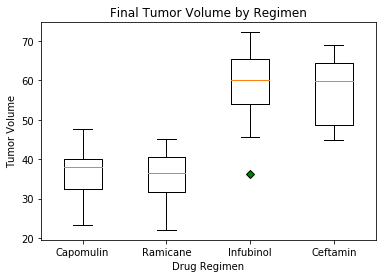

In [39]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
FinalTumor_Volume = comb_df.groupby(["Mouse ID"]).max()
FinalTumor_Volume = FinalTumor_Volume.reset_index()
DataTime = FinalTumor_Volume[["Mouse ID", "Timepoint"]]
TumorData = pd.merge(DataTime, comb_df, on=['Mouse ID','Timepoint'], how='left')

capomulin =  TumorData.loc[TumorData["Drug Regimen"] == "Capomulin"]['TumorVolume']
ramicane =  TumorData.loc[TumorData["Drug Regimen"] == "Ramicane"]['TumorVolume']
infubinol =  TumorData.loc[TumorData["Drug Regimen"] == "Infubinol"]['TumorVolume']
ceftamin =  TumorData.loc[TumorData["Drug Regimen"] == "Ceftamin"]['TumorVolume']

Drug_Summary = [capomulin, ramicane, infubinol, ceftamin]
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume by Regimen')
ax1.set_ylabel('Tumor Volume')
ax1.set_xlabel('Drug Regimen')
ax1.set_xticklabels(['Capomulin','Ramicane','Infubinol','Ceftamin'])
green_diamond = dict(markerfacecolor='g', marker='D')
ax1.boxplot(Drug_Summary,flierprops=green_diamond)

plt.show()


## Line and scatter plots

[Text(0, 0.5, 'Tumor Volume mm3')]

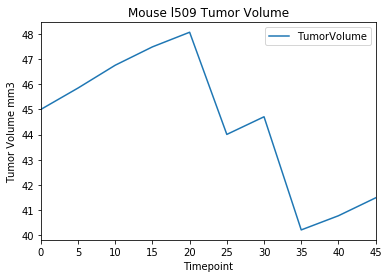

In [25]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
Capomulin_Regimen = comb_df[(comb_df["Mouse ID"] == 'l509')]
Capomulin_Regimen = Capomulin_Regimen[['TumorVolume', 'Timepoint']]
Capomulin_Regimen = Capomulin_Regimen.set_index(['Timepoint'])
ax = Capomulin_Regimen.plot.line(title = "Mouse l509 Tumor Volume")
ax.set(ylabel = "Tumor Volume mm3")


Text(0, 0.5, 'Average Tumor Volume')

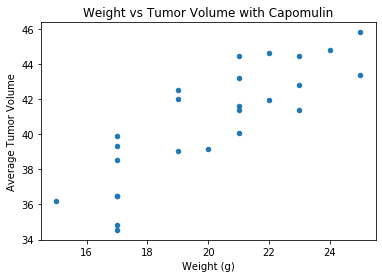

In [26]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
Weight_Volume_Capomulin = comb_df[(comb_df['Drug Regimen'] == "Capomulin")]
Weight_Volume_Capomulin = Weight_Volume_Capomulin.groupby(['Mouse ID']).mean()
ax = Weight_Volume_Capomulin.plot.scatter(title = "Weight vs Tumor Volume with Capomulin", x='Weight (g)', y='TumorVolume')
ax.set_ylabel("Average Tumor Volume")


The r-squared is: 0.8419363424694718


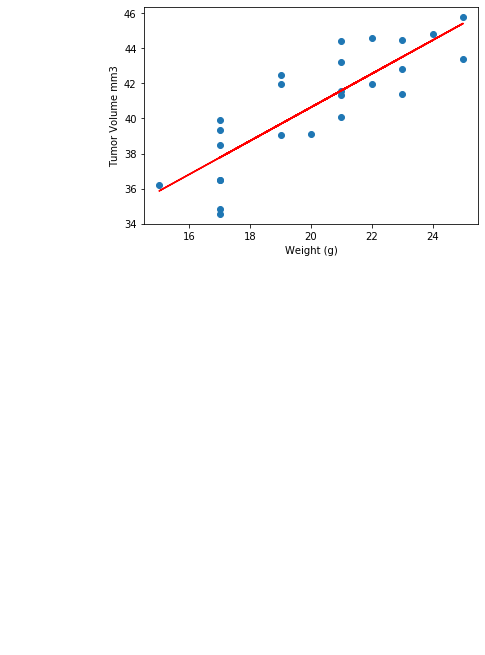

In [27]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
Weight_Volume_Capomulin = comb_df[(comb_df['Drug Regimen'] == "Capomulin")]
Weight_Volume_Capomulin = Weight_Volume_Capomulin.groupby(['Mouse ID']).mean()

x_values = Weight_Volume_Capomulin['Weight (g)']
y_values = Weight_Volume_Capomulin['TumorVolume']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,10),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume mm3')
print(f"The r-squared is: {rvalue}")
plt.show()
